In [239]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import keras
from PIL import Image

In [2]:
from glob import glob
trn1='D:/data/data/invasive-aquatic-species-data/invasive/*/'
trn2='D:/data/data/invasive-aquatic-species-data/noninvasive/*/'
tr1= glob(trn1)
tr2= glob(trn2)

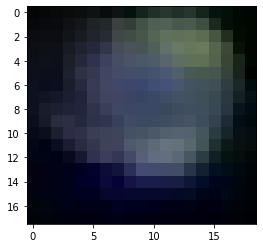

In [3]:
imgs = glob(tr1[6]+'/*')
c = Image.open(imgs[5])
plt.imshow(c)

In [4]:
inv_c = 0
for i in tr1:
    for j in glob(i+'/*'):
        inv_c = inv_c + 1

ninv_c = 0
for i in tr2:
    for j in glob(i+'/*'):
        ninv_c = ninv_c + 1

In [13]:
ninv_c

93687

In [17]:
tran_index_inv = np.round( len(tr1)* .8  )
tran_index_noninv = np.round( len(tr2)* .8  )
tran_index_noninv

2960.0

In [88]:
data = []
for i in tr1[:(int) (tran_index_inv)]:
    for j in glob(i+'/*'):
        data.append(j)

ydata = []
        
for i in range(len(data)):
    a = cv2.imread(data[i])
    b = cv2.resize(a,dsize = (40, 40))
    c = np.array(b)
    ydata.append(c.reshape(40,40,3))
    
        
xdata = np.array(ydata)
x_train = xdata
x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train),40,40,3))

from sklearn.utils import shuffle
x_train  = shuffle(x_train )


for i in tr2[:(int)(tran_index_noninv)]:
    for j in glob(i+'/*'):
        data.append(j)


imgdata=[]
        
for i in range(len(data)):
    a = cv2.imread(data[i])
    b = cv2.resize(a,dsize = (40,40))
    c = np.array(b)
    imgdata.append(c.reshape(40,40,3))

    
xdata = np.array(imgdata)
x_train_noninv = xdata
x_train_noninv = x_train_noninv.astype('float32') / 255.
x_train_noninv = np.reshape( x_train_noninv , (len( x_train_noninv ),40,40,3))

x_train_noninv  = shuffle(x_train_noninv)



In [ ]:
data = []
label = []
for i in tr1[:(int) (tran_index_inv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)

ydata = []
        
for i in range(len(data)):
    a = cv2.imread(data[i])
    b = cv2.resize(a,dsize = (40, 40))
    c = np.array(b)
    ydata.append(c.reshape(40,40,3))
    
        

for i in tr2[:(int)(tran_index_noninv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)

imgdata=[]
for i in range(len(data)):
    a = cv2.imread(data[i])
    b = cv2.resize(a,dsize = (40,40))
    c = np.array(b)
    imgdata.append(c.reshape(40,40,3))
    

In [67]:
np.shape(x_train)

(15621, 4800)

In [ ]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_train = idata
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train),40,40,3))
# One hot vector representation of labels
Y_train = to_categorical(label)

X_train,Y_train = shuffle(X_train,Y_train)

In [ ]:
data = []
label = []
for i in tr1[(int) (tran_index_inv) + 1 :]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)


for i in tr2[ (int)(tran_index_noninv) + 1:]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)

imgdata=[]
for i in range(len(data)):
    a = cv2.imread(data[i])
    b = cv2.resize(a,dsize = (40 , 40))
    c = np.array(b)
    imgdata.append(c.reshape(40,40,3))
    

(20196, 25, 25, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_test = idata
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test),40,40,3))
# One hot vector representation of labels
Y_test = to_categorical(label)



X_test,Y_test = shuffle(X_test , Y_test)

In [23]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [24]:
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [25]:
from tensorflow.keras.optimizers import Adam
import numpy as np
from tqdm import tqdm


optimizer = Adam(0.0002, 0.5)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU


In [125]:
class_weight = {0: 1,
                1: 25}

In [126]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(40, 40, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),))
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(2, activation="softmax"))



model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=([get_f1]))

model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_split = .4, verbose = 1, class_weight=class_weight)

Epoch 1/15
2025/2025 [==============================] - 78s 38ms/step - loss: 0.9613 - get_f1: 0.7521 - val_loss: 0.3976 - val_get_f1: 0.8422
Epoch 2/15
2025/2025 [==============================] - 76s 37ms/step - loss: 0.7847 - get_f1: 0.8032 - val_loss: 0.3531 - val_get_f1: 0.8606
Epoch 3/15
2025/2025 [==============================] - 73s 36ms/step - loss: 0.7350 - get_f1: 0.8151 - val_loss: 0.4230 - val_get_f1: 0.8327
Epoch 4/15
2025/2025 [==============================] - 73s 36ms/step - loss: 0.6701 - get_f1: 0.8352 - val_loss: 0.3654 - val_get_f1: 0.8415
Epoch 5/15
2025/2025 [==============================] - 74s 37ms/step - loss: 0.6484 - get_f1: 0.8386 - val_loss: 0.7203 - val_get_f1: 0.7586
Epoch 6/15
2025/2025 [==============================] - 69s 34ms/step - loss: 0.6223 - get_f1: 0.8486 - val_loss: 0.3279 - val_get_f1: 0.8713
Epoch 7/15
2025/2025 [==============================] - 80s 39ms/step - loss: 0.5970 - get_f1: 0.8570 - val_loss: 0.5214 - val_get_f1: 0.8115
Epoch 

In [87]:
np.shape(y_p)

(92537,)

In [127]:
pred = model.predict(X_train)
p = np.round(pred)
f1 = get_f1(Y_train, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_train)):
    if ( Y_train[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a

array([[68082,  8834],
       [  301, 15320]], dtype=int64)

In [128]:
non_inv_true = []
j=0
for i in range(len(p)):
    if ( y_t[i] == 0 ):
        if ( y_p[i] == 0 ):
            non_inv_true.append(i)

            
non_inv_false = []
j=0
for i in range(len(p)):
    if ( y_t[i] == 0 ):
        if ( y_p[i] == 1 ):
            non_inv_false.append(i)

In [145]:
len(non_inv_true)

68082

In [139]:
pred = model.predict(X_train)

In [140]:
pred[non_inv_false[30]]  #0,1

array([0.11171892, 0.88828105], dtype=float32)

In [213]:
false_index1 = []
for i in range(len(non_inv_false)):
    x=(pred[non_inv_false[i]][1])
    
    if(x >.7):
        false_index1.append(non_inv_false[i])
        

len(false_index1)

6804

In [180]:
pred[non_inv_false[false_index1[0]]]

array([0.12007344, 0.8799265 ], dtype=float32)

In [218]:
false_index = []
for i in range(len(non_inv_true)):
    x=(pred[non_inv_true[i]][0])
    
    if(x <.7):
        false_index.append(non_inv_true[i])
        

len(false_index)

2503

In [190]:
pred[non_inv_true[false_index[600]]]

array([0.6218644, 0.3781356], dtype=float32)

In [174]:
(Y_train[9] == [1.0,0.0]).all()

True

In [228]:
XT = []
YT = []

for i in range(len(X_train)):
    
    if(y_t[i] == 0):
        
        if(i in false_index):
                   
            XT.append(X_train[i])
            YT.append(1)
            
        else :
            
            XT.append(X_train[i])
            YT.append(0)
            
    elif(y_t[i] == 1):
        
        XT.append(X_train[i])
        YT.append(1)

        
len(XT)

95040

In [231]:
Y_truth = to_categorical(YT)

In [232]:
X_tr,Y_tr = shuffle(XT,Y_truth)

In [234]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(YT),YT)
class_weights

C:\Users\chsha\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

array([0.67777271, 1.90629012])

In [235]:
class_weight = {0: .67,
                1: 1.9}

In [236]:


def create_classifier():
    
    classifier = Sequential()
    
    classifier.add(layers.Conv2D(32, (3, 3), input_shape=(40, 40, 3)))

    classifier.add(layers.MaxPooling2D((2, 2)))
    classifier.add(layers.Conv2D(64, (3, 3), activation="relu"))
    classifier.add(layers.MaxPooling2D((2, 2)))
    classifier.add(layers.Conv2D(64, (3, 3),))
    classifier.add(layers.Flatten()) 
    classifier.add(layers.Dense(64, activation="relu"))
    classifier.add(layers.Dense(2, activation="softmax"))
    
    return classifier

In [237]:
classifier = create_classifier()
classifier.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[get_f1])
classifier.fit(X_train, Y_train, epochs=15, batch_size=32, validation_split = .3, verbose = 1)

Epoch 1/15
2025/2025 [==============================] - 75s 37ms/step - loss: 0.2219 - get_f1: 0.9016 - val_loss: 0.3209 - val_get_f1: 0.8503
Epoch 2/15
2025/2025 [==============================] - 80s 40ms/step - loss: 0.1779 - get_f1: 0.9219 - val_loss: 0.1722 - val_get_f1: 0.9264
Epoch 3/15
2025/2025 [==============================] - 82s 41ms/step - loss: 0.1644 - get_f1: 0.9291 - val_loss: 0.1765 - val_get_f1: 0.9276
Epoch 4/15
2025/2025 [==============================] - 81s 40ms/step - loss: 0.1565 - get_f1: 0.9337 - val_loss: 0.1495 - val_get_f1: 0.9363
Epoch 5/15
2025/2025 [==============================] - 80s 40ms/step - loss: 0.1504 - get_f1: 0.9364 - val_loss: 0.1576 - val_get_f1: 0.9330
Epoch 6/15
2025/2025 [==============================] - 84s 42ms/step - loss: 0.1442 - get_f1: 0.9389 - val_loss: 0.1331 - val_get_f1: 0.9437
Epoch 7/15
2025/2025 [==============================] - 78s 39ms/step - loss: 0.1394 - get_f1: 0.9413 - val_loss: 0.1285 - val_get_f1: 0.9459
Epoch 

In [238]:
pred = model.predict(X_test)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a

array([[14395,  2349],
       [  115,  3337]], dtype=int64)

In [ ]:
#model.save('C:/Users/chsha/Downloads/eBay_ML_Challenge_Dataset_2021/eBay_ML_Challenge_Dataset_2021/base_clf1_model.h5')

In [10]:
g = keras.models.load_model('D:/data/gmodel.h5')

(50000, 1875)

In [84]:
np.shape(x_train_noninv)

(92537, 40, 40, 3)